In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression


In [15]:
path_global_gdp=r"C:\Users\jator\OneDrive\ESSEX UNIVERSITY MASTERS DATA SCIENCE\module 4\Unit04 Global_GDP.csv"
path_global_population=r"C:\Users\jator\OneDrive\ESSEX UNIVERSITY MASTERS DATA SCIENCE\module 4\Unit04 Global_Population.csv"

In [16]:
df_gdp=pd.read_csv(path_global_gdp)
df_population=pd.read_csv(path_global_population)

In [17]:
df_gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.549721e+09,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1.929944e+10,1.970954e+10,2.147872e+10,2.571501e+10,2.351080e+10,2.679160e+10,...,9.427110e+11,9.498490e+11,9.635600e+11,9.837490e+11,9.186470e+11,8.720230e+11,9.842560e+11,1.011720e+12,1.008380e+12,9.188150e+11
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,...,6.709630e+11,7.275710e+11,8.207880e+11,8.514870e+11,7.607300e+11,6.905430e+11,6.837420e+11,7.416920e+11,7.945720e+11,7.845880e+11
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.117900e+11,1.280530e+11,1.367100e+11,1.457120e+11,1.161940e+11,1.011240e+11,1.221240e+11,1.013530e+11,8.941719e+10,5.837598e+10


In [18]:
df_population.head()

,Country Name,Country Code,Series Name,Series Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211,55438,56225,56695,57032,57360,...,102560,103159,103774,104341,104872,105366,105845,106314,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967,9169406,9351442,9543200,9744772,9956318,...,31161378,32269592,33370804,34413603,35383028,36296111,37171922,38041757,38928341,39835000
2,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765,134159786,137614644,141202036,144920186,148769974,...,547482863,562601578,578075373,593871847,609978946,626392880,643090131,660046272,677243299,694664000
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419,98407221,100506960,102691339,104953470,107289875,...,370243017,380437896,390882979,401586651,412551299,423769930,435229381,446911598,458803476,470898000
4,Albania,ALB,"Population, total",SP.POP.TOTL,1608800,1659800,1711319,1762621,1814135,1864791,...,2900401,2895092,2889104,2880703,2876101,2873457,2866376,2854191,2837743,2832000


In [19]:
df_gdp.isnull().sum()



Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              138
                 ... 
2016               10
2017               10
2018               10
2019               13
2020               25
Length: 65, dtype: int64

In [20]:
df_population.replace("..", np.nan, inplace=True)



Through a review of the csv files, it was visible in the gdp file that the following countries had no data 
    "Gibraltar",
    "Not classified",
    "St. Martin (French part)",
    "Korea, Dem. People's Rep.",
    "British Virgin Islands"
These countries must be dropped from the analysis


In [21]:
exclude_countries = [
    "Gibraltar",
    "Not classified",
    "St. Martin (French part)",
    "Korea, Dem. People's Rep.",
    "British Virgin Islands"
]

# Drop rows where 'Country Name' matches any in the list
df_gdp = df_gdp[~df_gdp['Country Name'].isin(exclude_countries)]


Same procedure is done with the population data set

In [22]:
exclude_countries = [
    "IBRD only",
    "IDA blend",
    "IDA only",
    "IDA total",
    "Not classified"
]

# Drop rows where 'Country Name' matches any in the list
df_population = df_population[~df_population['Country Name'].isin(exclude_countries)]

In [23]:
year_cols_gpd = df_gdp.columns[df_gdp.columns.str.isnumeric()]
year_cols_population = df_population.columns[df_population.columns.str.isnumeric()]


In [24]:
# ensure numeric dtype for year columns (population columns may be strings after the earlier replace)
df_population[year_cols_population] = df_population[year_cols_population].apply(pd.to_numeric, errors='coerce')

# compute averages
df_gdp['GDP_Average'] = df_gdp[year_cols_gpd].mean(axis=1)
df_population['Population_Average'] = df_population[year_cols_population].mean(axis=1)


In [26]:
years_to_drop = [str(year) for year in range(1960, 2021)]
gdp_cleaned = df_gdp.drop(columns=years_to_drop, errors='ignore')


In [29]:
years_to_drop = [str(year) for year in range(1960, 2022)]
population_cleaned = df_population.drop(columns=years_to_drop, errors='ignore')


In [33]:
new_df = pd.merge(gdp_cleaned, population_cleaned, on=['Country Code'], suffixes=('_GDP', '_Population'))   

new_df.columns

Index(['Country Name_GDP', 'Country Code', 'Indicator Name', 'Indicator Code',
       'GDP_Average', 'Country Name_Population', 'Series Name', 'Series Code',
       'Population_Average'],
      dtype='object')

In [34]:
cols_to_drop = ['Indicator Name', 'Indicator Code','Series Name', 'Series Code']
new_df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

In [36]:
numeric_df = new_df.select_dtypes(include=[np.number])
numeric_df.corr()

,GDP_Average,Population_Average
GDP_Average,1.000000,0.694427
Population_Average,0.694427,1.000000


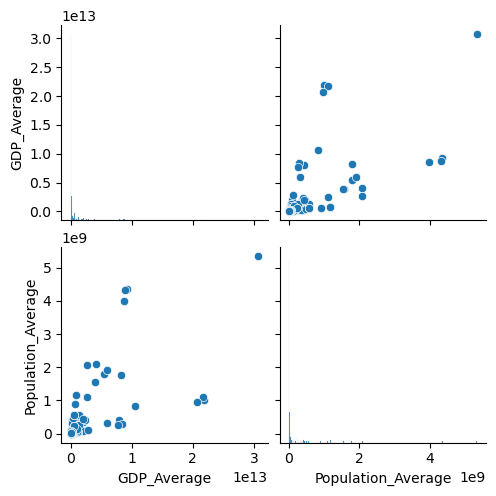

In [37]:
sns.pairplot(numeric_df)

Text(0.5, 1.0, 'Correlation Heatmap')

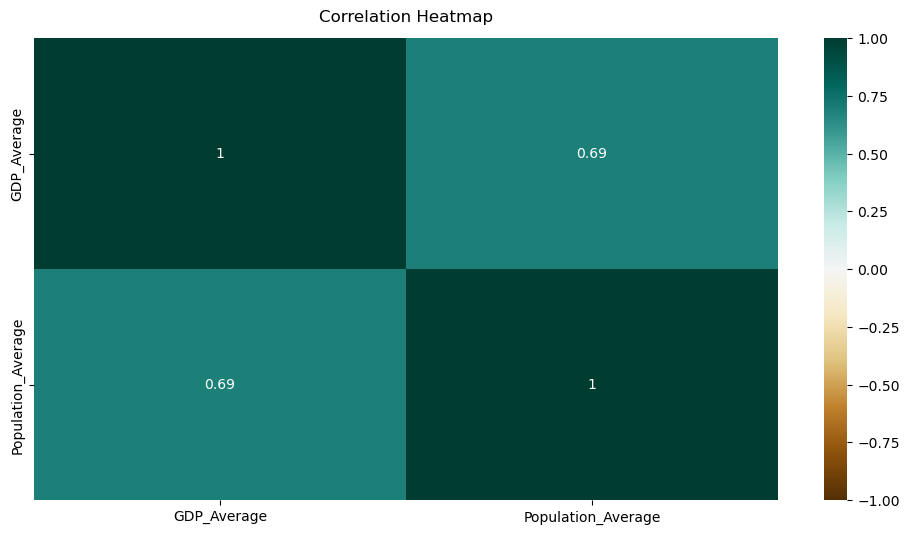

In [38]:
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(numeric_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

Pearsons correlation: 0.694


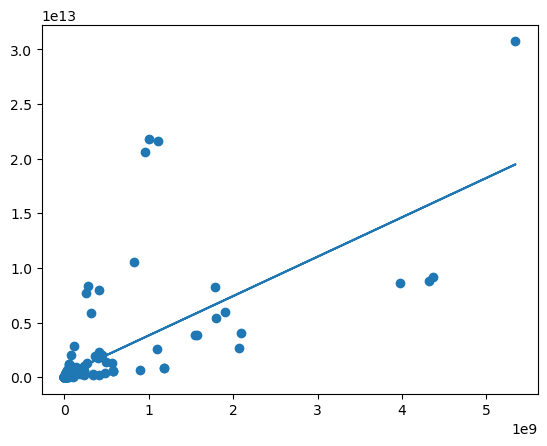

In [40]:



#Create the arrays that represent the values of the x and y axis
x = numeric_df["Population_Average"]
y = numeric_df["GDP_Average"]
#Execute a method that returns some important key values of Linear Regression
slope, intercept, r, p, std_err = stats.linregress(x, y)

# measure the correlation 
corr, _ = stats.pearsonr(x, y)
print('Pearsons correlation: %.3f' % corr)

#Create a function that uses the slope and intercept values to return a new value. 
#This new value represents where on the y-axis the corresponding x value will be placed
def myfunc(x):
  return slope * x + intercept

#Run each value of the x array through the function. This will result in a new array with new values for the y-axis
mymodel = list(map(myfunc, x))

#Draw the original scatter plot & the line of linear regression
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

- The regression line shows a clear upward slope, confirming this positive relationship.
- The spread of points and presence of outliers suggest some variability, but the overall trend is upward.
- This correlation implies that changes in your independent variable (x-axis) are fairly predictive of changes in your dependent variable (y-axis), though not perfectly.


In [43]:
# x must be a 2D array (n_samples, n_features); y should be 1D.
model = LinearRegression()
model.fit(x.values.reshape(-1, 1), y)


LinearRegression()

In [44]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 228906348608.80005
Coefficients: [3602.39798867]
